In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
# Read the sp500_close CSV file into a DataFrame called `sp500_df`:
sp500_df = pd.read_csv(
    Path('sp500_close.csv'),
    index_col='Date',
    parse_dates=True,
    infer_datetime_format=True
)

# Review the head and tail of the 'sp500_df' DataFrame:
display(sp500_df.head())
display(sp500_df.tail())

,Adj Close
Date,
2014-05-02,1881.140015
2014-05-05,1884.660034
2014-05-06,1867.719971
2014-05-07,1878.209961
2014-05-08,1875.630005


,Adj Close
Date,
2019-04-25,2926.169922
2019-04-26,2939.879883
2019-04-29,2943.030029
2019-04-30,2945.830078
2019-05-01,2923.729980


In [4]:
# Check the `sp500_df` DataFrame for any null values with the `isnull()` function
sp500_df.isnull().sum()

Adj Close    0
dtype: int64

In [6]:
# Create a DataFrame for the daily returns of `sp500_df` using the `pct_change()` function:
sp500_daily_returns = sp500_df.pct_change().dropna()

# Review the `sp500_daily_returns DataFrame:
display(sp500_daily_returns.head())
display(sp500_daily_returns.tail())

,Adj Close
Date,
2014-05-05,0.001871
2014-05-06,-0.008988
2014-05-07,0.005616
2014-05-08,-0.001374
2014-05-09,0.001519


,Adj Close
Date,
2019-04-25,-0.000369
2019-04-26,0.004685
2019-04-29,0.001072
2019-04-30,0.000951
2019-05-01,-0.007502


In [9]:
# CALCULATING CUMULATIVE RETURNS WITH PANDAS
# The cumulative return on an investment is the total return on that investment over a defined period of time.
# Think of it as an accumulation of return values for each day of the period multiplied upon one another.
# To calculate the cumulative return, we can use the `cumprod()` function.
# This function multiplies each number in a Pandas Series (aka DataFrame Column) by the next number in the series, through to the end of the series.
# To apply `cumprod()` to `daily_returns`, we'll use the following code:

# Calculate the cumulative returns using the `cumprod()` function:
cumulative_returns = (1+ sp500_daily_returns).cumprod()

# Review `cumulative_returns`
display(cumulative_returns.head())
display(cumulative_returns.tail())

# Each daily return value is a percentage calculation that's expressed as a decimal.
# To calculate the new value of an investment based on the return value, we need to add one to the return value.
# Therefore, to generate the cumulative_returns DataFrame, we need to add 1 to each daily_returns value.
# For example, 0.005 then becomes 1.005, allowing the multiplier that's associated with the `cumprod()` function to work properly.

,Adj Close
Date,
2014-05-05,1.001871
2014-05-06,0.992866
2014-05-07,0.998442
2014-05-08,0.997071
2014-05-09,0.998586


,Adj Close
Date,
2019-04-25,1.555530
2019-04-26,1.562818
2019-04-29,1.564493
2019-04-30,1.565981
2019-05-01,1.554233


In [12]:
# SKILL DRILL
stock_xyz = pd.DataFrame({'close': [11.25, 11.98, 10.74, 11.16, 12.35, 12.87, 13.03, 13.15, 13.50, 13.87]})

# Review the stock_xyz DataFrame:
display(stock_xyz.head())

# Create a daily returns DataFrame using the `pct_change()` function:
stock_xyz_daily_returns = stock_xyz.pct_change().dropna()

# Calculate the cumulative returns for stock_xyz:
stock_xyz_cumulative_returns = (1 + stock_xyz_daily_returns).cumprod()

# Review the stock_xyz_cumulative_returns DataFrame:
display(stock_xyz_cumulative_returns.head(10))

,close
0,11.25
1,11.98
2,10.74
3,11.16
4,12.35


,close
1,1.064889
2,0.954667
3,0.992000
4,1.097778
5,1.144000
6,1.158222
7,1.168889
8,1.200000
9,1.232889


<AxesSubplot:title={'center':'S&P 500 Cumulative Returns 2014-2019'}, xlabel='Date'>

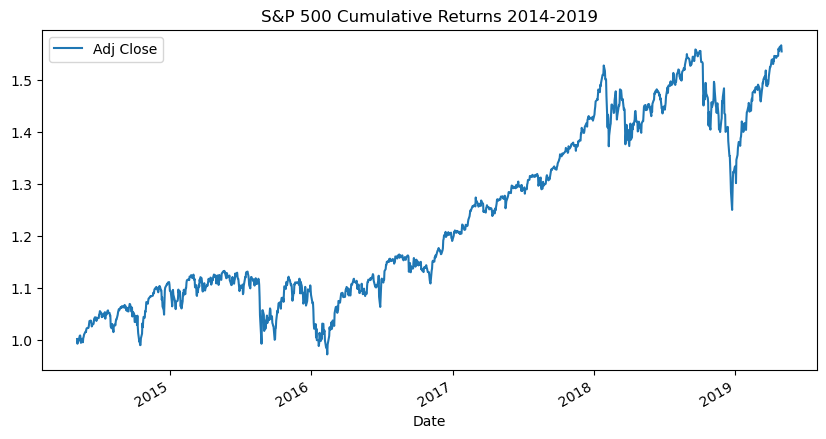

In [13]:
# Plot the cumulative returns of the S&P 500 over the last 5 years
cumulative_returns.plot(
    figsize=(10,5),
    title='S&P 500 Cumulative Returns 2014-2019'
)

,Adj Close
Date,
2016-05-02,1.007810
2016-05-03,0.999066
2016-05-04,0.993134
2016-05-05,0.992897
2016-05-06,0.996049


,Adj Close
Date,
2018-05-02,0.992794
2018-05-03,0.990557
2018-05-04,1.003247
2018-05-07,1.006716
2018-05-08,1.006449


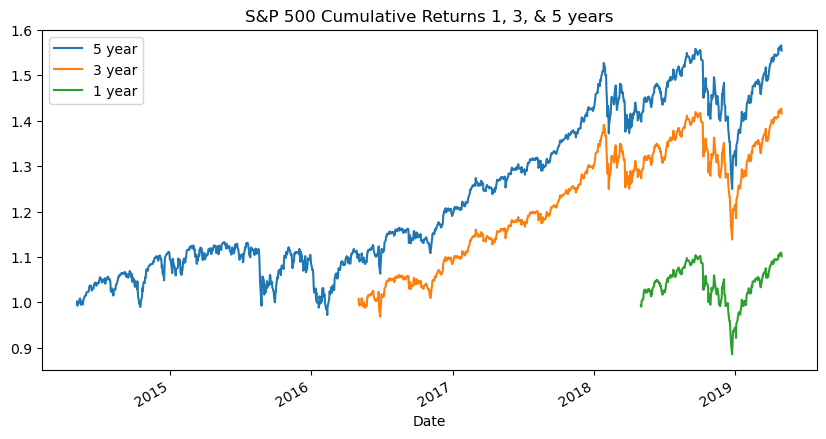

In [23]:
# CREATE OVERLAY PLOTS FOR CUMULATIVE RETURNS
# As an example, we'll plot the performance of the S&P 500 across the three time periods to find out how time influenced the cumulative performance of the asset:

# Create a daily returns DataFrame for three years:
daily_returns_3_year = sp500_daily_returns.loc['2016-05-02':'2019-05-02']

# Create a cumulative returns DataFrame for daily_returns_3_year:
cumulative_returns_3_year = (1 + daily_returns_3_year).cumprod()

# Review the 3 year cumulative returns DataFrame:
display(cumulative_returns_3_year.head())

# Create a daily returns DataFrame for one year:
daily_returns_1_year = sp500_daily_returns.loc['2018-05-02':'2019-05-02']

# Create a cumulative returns DataFrame for a one year time period:
cumulative_returns_1_year = (1 + daily_returns_1_year).cumprod()

# Review the 1 year cumulative returns DataFrame:
display(cumulative_returns_1_year.head())

ax = cumulative_returns.plot(
    legend='True',
    figsize=(10,5),
    title='S&P 500 Cumulative Returns 1, 3, & 5 years'
)
cumulative_returns_3_year.plot(ax=ax)
cumulative_returns_1_year.plot(ax=ax)

ax.legend(['5 year', '3 year', '1 year'])

# Note how we set the first plot equal to a variable named `ax`.
# `ax` stands for AXES OBJECTS. 
# In the first plot, we establish the `legend`, `figsize`, and `title` parameters.
# Inside the `plot` function for the two remaining plots, we pass `ax=ax` as a parameter.
# This sets the parameters for these two plots as equal to the parameters from the first plot.
# Finally, we define the plot's legend by setting the parameter of the `legend` function as a list of the plot's names in order.

In [ ]:
# Note that each plot stoarts at a different point on the x-axis.
# This is because the DataFrame has a different start date.
# Each plot also occupies different spots along the y-axis, because we plotted the cumulative returns.
# The five year plot had a much longer time to accumulate value than the three and one year plots.
# Also not that the dailly return behavior of the last year influences the cumulative return behavior in all three plots.
# This is why overlaying separate plots on the same visualization is so useful: It always yields compelling insights.